In [3]:
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import re
data=pd.read_csv(r"C:\Users\SSS\Downloads\mainproject.csv")
data

Unnamed: 0.1  Unnamed: 0 catagory  \
0               0           0   Makeup   
1               1           1   Makeup   
2               2           2   Makeup   
3               3           3   Makeup   
4               4           4   Makeup   
..            ...         ...      ...   
430           430         430     Baby   
431           431         431     Baby   
432           432         432     Baby   
433           433         433     Baby   
434           434         434     Baby   

                                                 title price  rating  reviwes  \
0    MamaEarth Charcoal Black Long Stay Kajal Black...  ₹184     4.3  (6,121)   
1    MamaEarth Moisture Matte Longstay Lipstick for...  ₹299     4.2  (4,938)   
2    MamaEarth Moisture Matte Longstay Lipstick for...  ₹299     4.2  (4,938)   
3    MamaEarth Rose Tinted 100% Natural Lip Balm fo...  ₹179     4.3  (7,068)   
4    MamaEarth Moisture Matte Longstay Lipstick for...  ₹299     4.2  (4,938)   
..                                                 ...   ...     ...      ...   
430  MamaEarth Milky Soft Natural Baby Face Cream f...  ₹375     4.3    (637)   
431  MamaEarth Natural Insect Repellent for babies ...  ₹569     4.2     (11)   
432  MamaEarth Easy baby Tummy Roll On for Digestio...  ₹375     4.5    (418)   
433  MamaEarth Milky Soft Natural Baby Face Cream f...  ₹498     4.3    (637)   
434  MamaEarth Easy baby Tummy Roll On for Digestio...  ₹351     4.3    (206)   

    org_Cost    offer          r  
0       ₹299  38% off  Very good  
1       ₹499  40% off  Very good  
2       ₹499  40% off  Very good  
3       ₹299  40% off  Very good  
4       ₹499  40% off  Very good  
..       ...      ...        ...  
430     ₹469  20% off  Very good  
431     ₹669  14% off  Very good  
432     ₹469  20% off  Excellent  
433     ₹598  16% off  Very good  
434     ₹439  20% off  Very good  

[435 rows x 10 columns]

* There is a Unnamed  column we delete it

In [4]:
data=data.drop("Unnamed: 0",axis=1)
data=data.drop("Unnamed: 0.1",axis=1)
data

catagory                                              title price  rating  \
0     Makeup  MamaEarth Charcoal Black Long Stay Kajal Black...  ₹184     4.3   
1     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...  ₹299     4.2   
2     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...  ₹299     4.2   
3     Makeup  MamaEarth Rose Tinted 100% Natural Lip Balm fo...  ₹179     4.3   
4     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...  ₹299     4.2   
..       ...                                                ...   ...     ...   
430     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...  ₹375     4.3   
431     Baby  MamaEarth Natural Insect Repellent for babies ...  ₹569     4.2   
432     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...  ₹375     4.5   
433     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...  ₹498     4.3   
434     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...  ₹351     4.3   

     reviwes org_Cost    offer          r  
0    (6,121)     ₹299  38% off  Very good  
1    (4,938)     ₹499  40% off  Very good  
2    (4,938)     ₹499  40% off  Very good  
3    (7,068)     ₹299  40% off  Very good  
4    (4,938)     ₹499  40% off  Very good  
..       ...      ...      ...        ...  
430    (637)     ₹469  20% off  Very good  
431     (11)     ₹669  14% off  Very good  
432    (418)     ₹469  20% off  Excellent  
433    (637)     ₹598  16% off  Very good  
434    (206)     ₹439  20% off  Very good  

[435 rows x 8 columns]

* replace the unwanted symbols

In [5]:
data["price"]=data["price"].str.replace("₹","")
data["reviwes"]=data["reviwes"].str.replace("(","")
data["reviwes"]=data["reviwes"].str.replace(")","")
data["org_Cost"]=data["org_Cost"].str.replace("₹","")
data["offer"]=data["offer"].str.replace("% ","")
data["offer"]=data["offer"].str.replace("off","")

C:\Users\SSS\AppData\Local\Temp\ipykernel_4664\3043765257.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["reviwes"]=data["reviwes"].str.replace("(","")
C:\Users\SSS\AppData\Local\Temp\ipykernel_4664\3043765257.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["reviwes"]=data["reviwes"].str.replace(")","")


In [6]:
data["price"]=data["price"].str.replace(",","")

In [7]:
data["reviwes"]=data["reviwes"].str.replace(",","")

In [8]:
data["org_Cost"]=data["org_Cost"].str.replace(",","")

* after replace unwanted strings

In [9]:
data

catagory                                              title price  rating  \
0     Makeup  MamaEarth Charcoal Black Long Stay Kajal Black...   184     4.3   
1     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...   299     4.2   
2     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...   299     4.2   
3     Makeup  MamaEarth Rose Tinted 100% Natural Lip Balm fo...   179     4.3   
4     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...   299     4.2   
..       ...                                                ...   ...     ...   
430     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...   375     4.3   
431     Baby  MamaEarth Natural Insect Repellent for babies ...   569     4.2   
432     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...   375     4.5   
433     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...   498     4.3   
434     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...   351     4.3   

    reviwes org_Cost offer          r  
0      6121      299    38  Very good  
1      4938      499    40  Very good  
2      4938      499    40  Very good  
3      7068      299    40  Very good  
4      4938      499    40  Very good  
..      ...      ...   ...        ...  
430     637      469    20  Very good  
431      11      669    14  Very good  
432     418      469    20  Excellent  
433     637      598    16  Very good  
434     206      439    20  Very good  

[435 rows x 8 columns]

* To find out the unique values

In [10]:
data["rating"].fillna(0,inplace=True)
data["rating"].unique()

array([4.3, 4.2, 4.1, 4.8, 4.5, 4.4, 3.3, 0. , 4. , 3.7, 3.9, 3.6, 3.8,
       4.6, 5. , 1. , 4.7, 2. , 3. , 3.5, 3.4, 2.6])

In [11]:
data["reviwes"].fillna(0,inplace=True)
data["reviwes"].unique()

array(['6121', '4938', '7068', '287', '5945', '1842', '2775', '1169',
       '14', '5370', '9', '2395', '1036', '38', '688', '887', '1236',
       '15', '7', '966', '3', '11', 0, '213676', '60578', '95136', '839',
       '84810', '60254', '42023', '8862', '14476', '11804', '60', '18788',
       '10909', '32982', '8635', '25595', '29660', '24', '16805', '7356',
       '8083', '3694', '12618', '5031', '16603', '9796', '11253', '7007',
       '5758', '6228', '10644', '19640', '15132', '159', '1483', '10658',
       '37791', '1853', '13849', '10249', '9028', '998', '100', '6598',
       '2391', '1836', '3025', '4294', '6504', '13378', '810', '3301',
       '1089', '3605', '383', '18290', '1498', '2781', '481', '2819',
       '317', '241', '512', '5812', '6449', '1873', '6013', '1951',
       '2530', '865', '125', '2116', '102', '1966', '2129', '3856',
       '6658', '65', '300', '151', '3194', '1051', '176', '8896', '5925',
       '2468', '3114', '39', '350', '4083', '96', '1258', '1135', 

In [12]:
data["price"].unique()

array(['184', '299', '179', '239', '359', '135', '335', '679', '153',
       '278', '224', '159', '155', '269', '319', '149', '613', '307',
       '290', '268', '209', '311', '196', '191', '423', '549', '451',
       '424', '336', '484', '363', '388', '499', '711', '160', '182',
       '140', '230', '167', '251', '664', '284', '271', '151', '200',
       '265', '150', '220', '183', '139', '152', '207', '64', '215',
       '201', '100', '165', '142', '258', '244', '199', '243', '128',
       '168', '120', '129', '193', '208', '245', '569', '459', '743',
       '599', '516', '343', '279', '348', '379', '378', '369', '257',
       '361', '119', '264', '287', '216', '121', '166', '305', '944',
       '1596', '192', '1099', '401', '479', '357', '206', '419', '649',
       '849', '1699', '187', '360', '315', '553', '899', '399', '489',
       '295', '685', '175', '148', '131', '325', '323', '240', '164',
       '143', '236', '144', '253', '358', '176', '879', '1229', '158',
       '383', '23

In [13]:
data["reviwes"].isnull().sum()

0

* To change the datatype

In [14]:
data["reviwes"]=data.reviwes.astype(int)

In [15]:
data["price"]=data.price.astype(int)

In [16]:
data["org_Cost"]=data.org_Cost.astype(int)

In [17]:
data["offer"]=data.offer.astype(int)

In [18]:
data

catagory                                              title  price  \
0     Makeup  MamaEarth Charcoal Black Long Stay Kajal Black...    184   
1     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
2     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
3     Makeup  MamaEarth Rose Tinted 100% Natural Lip Balm fo...    179   
4     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
..       ...                                                ...    ...   
430     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    375   
431     Baby  MamaEarth Natural Insect Repellent for babies ...    569   
432     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    375   
433     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    498   
434     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    351   

     rating  reviwes  org_Cost  offer          r  
0       4.3     6121       299     38  Very good  
1       4.2     4938       499     40  Very good  
2       4.2     4938       499     40  Very good  
3       4.3     7068       299     40  Very good  
4       4.2     4938       499     40  Very good  
..      ...      ...       ...    ...        ...  
430     4.3      637       469     20  Very good  
431     4.2       11       669     14  Very good  
432     4.5      418       469     20  Excellent  
433     4.3      637       598     16  Very good  
434     4.3      206       439     20  Very good  

[435 rows x 8 columns]

In [19]:
len(data["catagory"].unique())

5

 * 5 catagories

*To replace nan values with mean

In [20]:
a=data["rating"].mean()
a

4.007356321839084

In [21]:
data=data.replace({"rating":0},a)

In [22]:
b=data["reviwes"].mean()
b

5570.4689655172415

In [23]:
data=data.replace({"reviwes":0},b)

In [24]:
data

catagory                                              title  price  \
0     Makeup  MamaEarth Charcoal Black Long Stay Kajal Black...    184   
1     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
2     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
3     Makeup  MamaEarth Rose Tinted 100% Natural Lip Balm fo...    179   
4     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
..       ...                                                ...    ...   
430     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    375   
431     Baby  MamaEarth Natural Insect Repellent for babies ...    569   
432     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    375   
433     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    498   
434     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    351   

     rating  reviwes  org_Cost  offer          r  
0       4.3   6121.0       299     38  Very good  
1       4.2   4938.0       499     40  Very good  
2       4.2   4938.0       499     40  Very good  
3       4.3   7068.0       299     40  Very good  
4       4.2   4938.0       499     40  Very good  
..      ...      ...       ...    ...        ...  
430     4.3    637.0       469     20  Very good  
431     4.2     11.0       669     14  Very good  
432     4.5    418.0       469     20  Excellent  
433     4.3    637.0       598     16  Very good  
434     4.3    206.0       439     20  Very good  

[435 rows x 8 columns]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   catagory  435 non-null    object 
 1   title     435 non-null    object 
 2   price     435 non-null    int32  
 3   rating    435 non-null    float64
 4   reviwes   435 non-null    float64
 5   org_Cost  435 non-null    int32  
 6   offer     435 non-null    int32  
 7   r         435 non-null    object 
dtypes: float64(2), int32(3), object(3)
memory usage: 22.2+ KB


In [26]:
data.isnull().sum()

catagory    0
title       0
price       0
rating      0
reviwes     0
org_Cost    0
offer       0
r           0
dtype: int64

*no nan values in csv file

In [62]:
r=[]

for i in data["rating"]:
    if i>=4.5:
        r.append("Excellent")
    elif i >=4 and i<=4.5:
        r.append("Very good")
    elif i>=3.5 and i<=4:
        r.append("Good")
    elif i>=3 and i<=3.5:
        r.append("Nice")
    elif i<3 :
        r.append("Poor")  
r        

['Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Excellent',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Excellent',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Nice',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Excellent',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Very good

In [63]:
len(r)

435

In [27]:
data

catagory                                              title  price  \
0     Makeup  MamaEarth Charcoal Black Long Stay Kajal Black...    184   
1     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
2     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
3     Makeup  MamaEarth Rose Tinted 100% Natural Lip Balm fo...    179   
4     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
..       ...                                                ...    ...   
430     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    375   
431     Baby  MamaEarth Natural Insect Repellent for babies ...    569   
432     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    375   
433     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    498   
434     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    351   

     rating  reviwes  org_Cost  offer          r  
0       4.3   6121.0       299     38  Very good  
1       4.2   4938.0       499     40  Very good  
2       4.2   4938.0       499     40  Very good  
3       4.3   7068.0       299     40  Very good  
4       4.2   4938.0       499     40  Very good  
..      ...      ...       ...    ...        ...  
430     4.3    637.0       469     20  Very good  
431     4.2     11.0       669     14  Very good  
432     4.5    418.0       469     20  Excellent  
433     4.3    637.0       598     16  Very good  
434     4.3    206.0       439     20  Very good  

[435 rows x 8 columns]

In [65]:
#data["Feedback"]=r
#data

In [28]:
data.rename(columns={"catagory":"Category","title":"Title","price":"Price","rating":"Rating","reviwes":"Reviews","offer":"Discount(%)","r":"Feedback"},inplace=True)
data

Category                                              Title  Price  \
0     Makeup  MamaEarth Charcoal Black Long Stay Kajal Black...    184   
1     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
2     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
3     Makeup  MamaEarth Rose Tinted 100% Natural Lip Balm fo...    179   
4     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
..       ...                                                ...    ...   
430     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    375   
431     Baby  MamaEarth Natural Insect Repellent for babies ...    569   
432     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    375   
433     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    498   
434     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    351   

     Rating  Reviews  org_Cost  Discount(%)   Feedback  
0       4.3   6121.0       299           38  Very good  
1       4.2   4938.0       499           40  Very good  
2       4.2   4938.0       499           40  Very good  
3       4.3   7068.0       299           40  Very good  
4       4.2   4938.0       499           40  Very good  
..      ...      ...       ...          ...        ...  
430     4.3    637.0       469           20  Very good  
431     4.2     11.0       669           14  Very good  
432     4.5    418.0       469           20  Excellent  
433     4.3    637.0       598           16  Very good  
434     4.3    206.0       439           20  Very good  

[435 rows x 8 columns]

In [29]:
data.duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
430    False
431    False
432    False
433    False
434    False
Length: 435, dtype: bool

In [30]:
 data[data.duplicated()]

Category                                              Title  Price  \
2     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
4     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
6     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
9     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
14    Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
15    Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
23    Makeup  MamaEarth Naturally Matte Lip Serum - Matte Li...    359   
25    Makeup  MamaEarth Naturally Matte Lip Serum - Matte Li...    359   
27    Makeup  MamaEarth Naturally Matte Lip Serum - Matte Li...    359   
29    Makeup  MamaEarth Naturally Matte Lip Serum - Matte Li...    359   
30    Makeup  MamaEarth Naturally Matte Lip Serum - Matte Li...    359   
33    Makeup  MamaEarth Naturally Matte Lip Serum - Matte Li...    359   
34    Makeup  MamaEarth Naturally Matte Lip Serum - Matte Li...    359   
91      face  MamaEarth Vitamin C  with Vitamin C and Turmer...    269   
119     face  MamaEarth Ubtan Natural  with Turmeric & Saffr...    278   
123     face  MamaEarth "Vitamin C  with Vitamin C and Turme...    153   
404     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    159   

     Rating  Reviews  org_Cost  Discount(%)   Feedback  
2       4.2   4938.0       499           40  Very good  
4       4.2   4938.0       499           40  Very good  
6       4.2   4938.0       499           40  Very good  
9       4.2   4938.0       499           40  Very good  
14      4.2   4938.0       499           40  Very good  
15      4.2   4938.0       499           40  Very good  
23      4.1   1036.0       599           40  Very good  
25      4.1   1036.0       599           40  Very good  
27      4.1   1036.0       599           40  Very good  
29      4.1   1036.0       599           40  Very good  
30      4.1   1036.0       599           40  Very good  
33      4.1   1036.0       599           40  Very good  
34      4.1   1036.0       599           40  Very good  
91      4.3  18788.0       449           40  Very good  
119     4.4  60578.0       498           44  Very good  
123     4.2  95136.0       249           38  Very good  
404     4.3   1358.0       398           60  Very good

In [31]:
data=data.drop_duplicates(ignore_index=True)
data

Category                                              Title  Price  \
0     Makeup  MamaEarth Charcoal Black Long Stay Kajal Black...    184   
1     Makeup  MamaEarth Moisture Matte Longstay Lipstick for...    299   
2     Makeup  MamaEarth Rose Tinted 100% Natural Lip Balm fo...    179   
3     Makeup  MamaEarth Soothing Waterproof Eyeliner with Al...    239   
4     Makeup  MamaEarth Cherry Tinted 100% Natural Lip Balm ...    179   
..       ...                                                ...    ...   
413     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    375   
414     Baby  MamaEarth Natural Insect Repellent for babies ...    569   
415     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    375   
416     Baby  MamaEarth Milky Soft Natural Baby Face Cream f...    498   
417     Baby  MamaEarth Easy baby Tummy Roll On for Digestio...    351   

     Rating  Reviews  org_Cost  Discount(%)   Feedback  
0       4.3   6121.0       299           38  Very good  
1       4.2   4938.0       499           40  Very good  
2       4.3   7068.0       299           40  Very good  
3       4.3    287.0       399           40  Very good  
4       4.2   5945.0       299           40  Very good  
..      ...      ...       ...          ...        ...  
413     4.3    637.0       469           20  Very good  
414     4.2     11.0       669           14  Very good  
415     4.5    418.0       469           20  Excellent  
416     4.3    637.0       598           16  Very good  
417     4.3    206.0       439           20  Very good  

[418 rows x 8 columns]

In [32]:
data.duplicated().sum()

0

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     418 non-null    object 
 1   Title        418 non-null    object 
 2   Price        418 non-null    int32  
 3   Rating       418 non-null    float64
 4   Reviews      418 non-null    float64
 5   org_Cost     418 non-null    int32  
 6   Discount(%)  418 non-null    int32  
 7   Feedback     418 non-null    object 
dtypes: float64(2), int32(3), object(3)
memory usage: 21.4+ KB


# DATA VISUALIZATION

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Category', ylabel='count'>

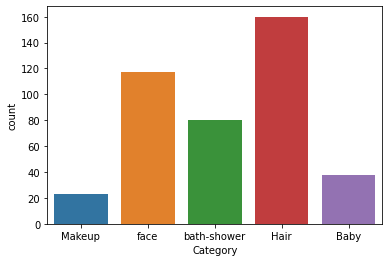

In [77]:
sns.countplot(data["Category"])

In [ ]:
# Category of hair is having highest count in flipkart

<AxesSubplot:xlabel='Feedback', ylabel='count'>

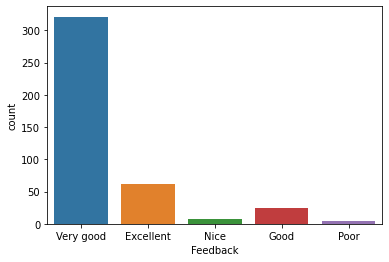

In [78]:
sns.countplot(data["Feedback"])

In [ ]:
# Max rating is above 4 to 4.5

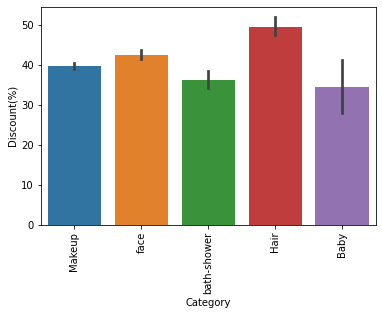

In [79]:
sns.barplot(x='Category',y='Discount(%)',data=data)
plt.xticks(rotation = 90)
plt.show()

In [80]:
#Highest discount offered by flipkart in  Hair category 
# Hair has MAX Offer

(array([364.,  45.,   5.,   2.,   2.]),
 array([  64.,  391.,  718., 1045., 1372., 1699.]),
 <BarContainer object of 5 artists>)

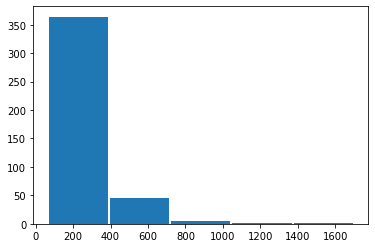

In [82]:
plt.hist(data["Price"],bins=5,rwidth=0.97)

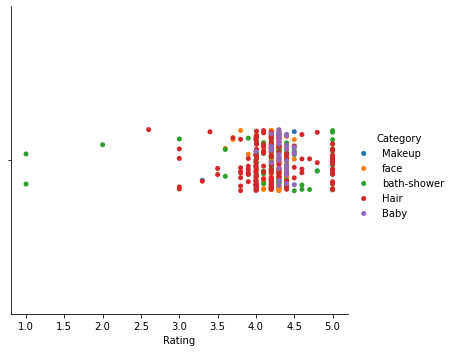

In [83]:
m=sns.FacetGrid(data=data,hue="Category",size=5)
m.map(sns.stripplot,"Rating")
m.add_legend()

In [ ]:
# In my dataset,most of the products have rating between 4 to 4.5.

<AxesSubplot:xlabel='Category', ylabel='Rating'>

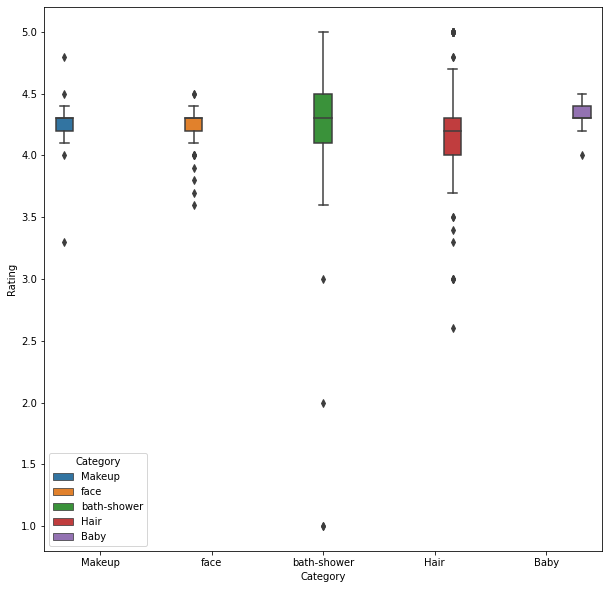

In [125]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,y="Rating",x="Category",hue="Category")

<AxesSubplot:xlabel='Category,Feedback'>

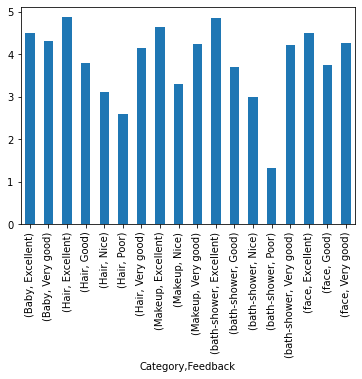

In [86]:
data.groupby(['Category','Feedback'])['Rating'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Category', ylabel='Price'>

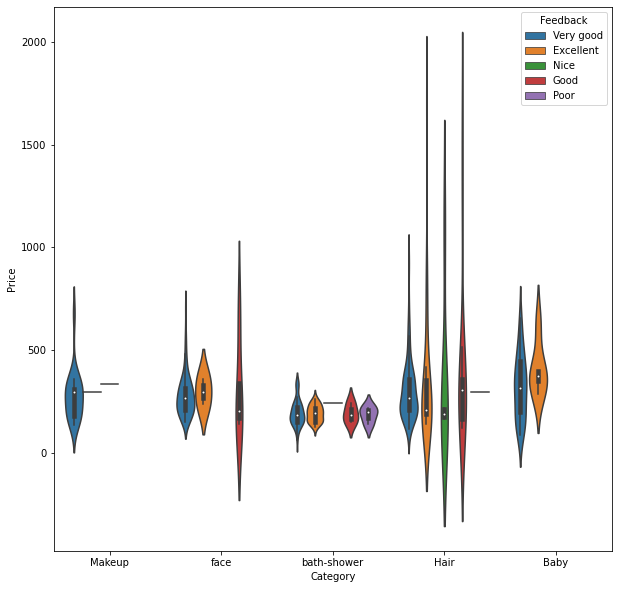

In [127]:
plt.figure(figsize=(10,10))
sns.violinplot(data=data,y="Price",x="Category",hue="Feedback")

<AxesSubplot:>

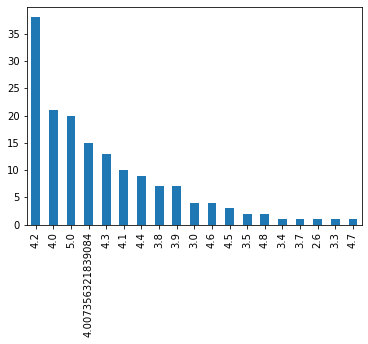

In [91]:
data[data['Category']=='Hair']['Rating'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

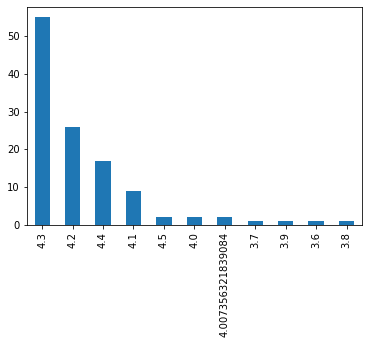

In [95]:
data[data["Category"]=='face']['Rating'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Density'>

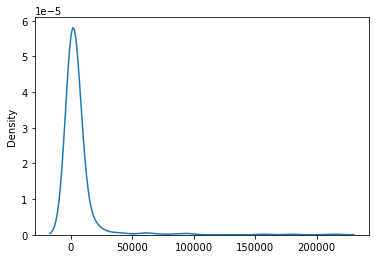

In [94]:
sns.distplot(x=data["Reviews"],hist=False)

In [99]:
data.groupby(["Category"])['Discount(%)'].mean()

Category
Baby           34.368421
Hair           49.587500
Makeup         39.826087
bath-shower    36.312500
face           42.538462
Name: Discount(%), dtype: float64

In [102]:
data.groupby(["Category","Title"])['Discount(%)'].max()

Category  Title                                                     
Baby      MamaEarth 100 Percent Natural Berry Blast Kids Toothpas...    18
          MamaEarth Deeply Nourishing Body Wash + Anti Mosquito F...    60
          MamaEarth Deeply Nourishing Body Wash + Milky Soft Natu...    56
          MamaEarth Deeply Nourishing Body Wash for Babies 400ml ...    64
          MamaEarth Easy baby Tummy Roll On for Digestion & Colic...    20
                                                                        ..
face      MamaEarth Vitamin C Underarm Cream with Vitamin C & Tur...    40
          MamaEarth ultimate ubtan de-tan kit                           44
          Manarya Sun's Heart Natural Green Tea l Soap Free l Dee...    44
          PINKROOT Ubtan Foaming  150ml Face Wash                       59
          The Nile Professional Vitamin B3- Skin Clearing Serum -...    74
Name: Discount(%), Length: 382, dtype: int32

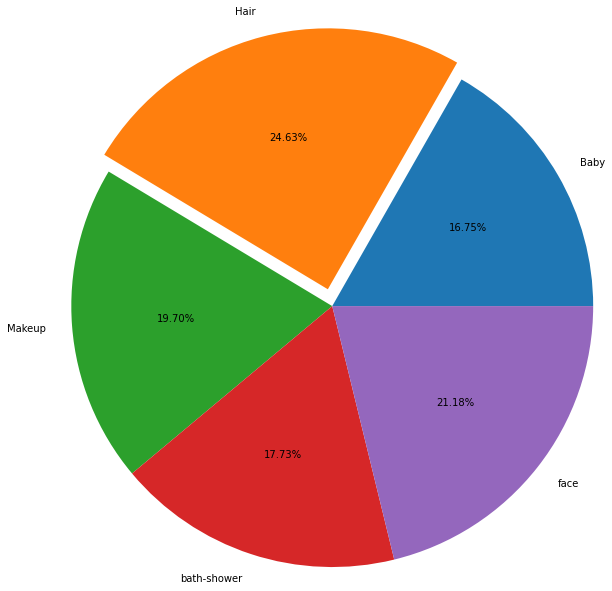

In [109]:
plt.pie([34,50,40,36,43],labels=["Baby","Hair","Makeup","bath-shower","face"],autopct="%0.2f%%",explode=[0,0.2,0,0,0],radius=3)
plt.show()

In [114]:
x=data.groupby("Category")


In [116]:
x.get_group("Makeup")["Rating"].max()

4.8

In [120]:
data["Title"].value_counts()

MamaEarth Milky Soft Natural Baby Face Cream for Babies...    5
MamaEarth Onion Oil for Hair Regrowth & Hair Fall Contr...    5
MamaEarth Talc Free Organic Dusting Powder for Babies w...    4
MamaEarth Tea Tree  with Neem for Acne &amp; Pimples Fa...    3
MamaEarth Gentle Cleansing Shampoo for babies (400 ml, ...    3
                                                             ..
MamaEarth Anti-Acne Glow Combo (Niacin Face Toner 200ml...    1
MamaEarth Rose Bamboo Sheet mask(Pack of 2)                   1
MamaEarth Aloe Vera Oil-Free Face Moisturizer for Oily ...    1
MamaEarth Rose Water Face Toner with Witch Hazel & Rose...    1
Nutriment Khadi Aloevera, Apple Cider Vinegar and Briti...    1
Name: Title, Length: 382, dtype: int64

In [33]:
 y=data.groupby("Title")

In [34]:
y.get_group("MamaEarth Milky Soft Natural Baby Face Cream for Babies...")["Rating"].max()

4.4

In [35]:
y.get_group("MamaEarth Milky Soft Natural Baby Face Cream for Babies...")["Reviews"].max()

5401.0